In [2]:
# Importing course packages; you can add more too!
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date, datetime, timezone, timedelta
from dateutil import tz
import pickle

# Importing course datasets
rides = pd.read_csv('capital-onebike.csv')
with open('florida_hurricane_dates.pkl', 'rb') as f:
    florida_hurricane_dates = pickle.load(f)
florida_hurricane_dates = sorted(florida_hurricane_dates)

rides.head() # Display the first five rows

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member
3,2017-10-02 08:56:45,2017-10-02 09:18:03,31037,Ballston Metro / N Stuart & 9th St N,31295,Potomac & M St NW,W20529,Member
4,2017-10-02 18:23:48,2017-10-02 18:45:05,31295,Potomac & M St NW,31230,Metro Center / 12th & G St NW,W20529,Member


Dates and Calendars

In [3]:
#Which day of the week?

# Create a date object
hurricane_andrew = date(1992, 8, 24)

# Which day of the week is the date?
print(hurricane_andrew.weekday())

0


In [4]:
# How many hurricanes come early?

# Counter for how many before June 1
early_hurricanes = 0

# We loop over the dates
for hurricane in florida_hurricane_dates:
  # Check if the month is before June (month number 6)
  if hurricane.month < 6:
    early_hurricanes = early_hurricanes + 1
    
print(early_hurricanes)

10


In [5]:
#Subtracting dates

# Create a date object for May 9th, 2007
start = date(2007, 5, 9)

# Create a date object for December 13th, 2007
end = date(2007, 12, 13)

# Subtract the two dates and print the number of days
print((end - start).days)

218


In [6]:
# A dictionary to count hurricanes per calendar month
hurricanes_each_month = {1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6:0,
		  				 7: 0, 8:0, 9:0, 10:0, 11:0, 12:0}

# Loop over all hurricanes
for hurricane in florida_hurricane_dates:
  # Pull out the month
  month = hurricane.month
  # Increment the count in your dictionary by one
  hurricanes_each_month[month] += 1
  
print(hurricanes_each_month)

{1: 0, 2: 1, 3: 0, 4: 1, 5: 8, 6: 32, 7: 21, 8: 49, 9: 70, 10: 43, 11: 9, 12: 1}


In [7]:
# Printing dates in a friendly format

# Assign the earliest date to first_date
first_date = min(florida_hurricane_dates)

# Convert to ISO and US formats
iso = "Our earliest hurricane date: " + first_date.isoformat()
us = "Our earliest hurricane date: " + first_date.strftime("%m/%d/%Y")

print("ISO: " + iso)
print("US: " + us)

ISO: Our earliest hurricane date: 1950-08-31
US: Our earliest hurricane date: 08/31/1950


In [8]:
# Create a date object
andrew = date(1992, 8, 26)

# Print the date in the format 'YYYY-MM'
print(andrew.strftime('%Y-%m'))

# Print the date in the format 'MONTH (YYYY)'
print(andrew.strftime("%B (%Y)"))

# Print the date in the format 'YYYY-DDD'
print(andrew.strftime('%Y-%j'))

1992-08
August (1992)
1992-239


*Combining Dates and Times*

In [9]:
# Creating datetimes by hand

# Create a datetime object
dt = datetime(2017, 10, 1, 15, 26, 26)

# Print the results in ISO 8601 format
print(dt.isoformat())

2017-10-01T15:26:26


In [10]:
from onebike_datetime import onebike_datetimes

# Counting events before and after noon

# Create dictionary to hold results
trip_counts = {'AM': 0, 'PM': 0}

# Loop over all trips
for trip in onebike_datetimes:
  # Check to see if the trip starts before noon
  if trip['start'].hour < 12:
    # Increment the counter for before noon
    trip_counts['AM'] += 1
  else:
    # Increment the counter for after noon
    trip_counts['PM'] += 1
  
print(trip_counts)

{'AM': 94, 'PM': 196}


Reference	
%Y	4 digit year (0000-9999)
%m	2 digit month (1-12)
%d	2 digit day (1-31)
%H	2 digit hour (0-23)
%M	2 digit minute (0-59)
%S	2 digit second (0-59)

In [11]:
# Printing and parsing datetimes

# Turning string into datetimes

# Starting string, in YYYY-MM-DD HH:MM:SS format
s1 = '2017-02-03 00:00:01'
s2 = '2030-10-15'
s3 = '12/15/1986 08:00:00'

# Write a format string to parse s
fmt1 = '%Y-%m-%d %H:%M:%S'
fmt2 = '%Y-%m-%d'
fmt3 = '%m/%d/%Y %H:%M:%S'

# Create a datetime object d
d1 = datetime.strptime(s1, fmt1)
d2 = datetime.strptime(s2, fmt2)
d3 = datetime.strptime(s3, fmt3)

# Print d
print(d1)
print(d2)
print(d3)

2017-02-03 00:00:01
2030-10-15 00:00:00
1986-12-15 08:00:00


In [12]:
# Parsing pairs of strings as datetimes

# Parsing is a process of converting formatted text into a data structure. A data structure type can be 
# any suitable representation of the information engraved in the source text.

from onebike_datetime_string import onebike_datetime_strings

# Write down the format string
fmt = "%Y-%m-%d %H:%M:%S"

# Initialize a list for holding the pairs of datetime objects
onebike_datetimes = []

# Loop over all trips
for (start, end) in onebike_datetime_strings:
  trip = {'start': datetime.strptime(start, fmt),
          'end': datetime.strptime(end, fmt)}
  
  # Append the trip
  onebike_datetimes.append(trip)

print(onebike_datetimes[0:4])

[{'start': datetime.datetime(2017, 10, 1, 15, 23, 25), 'end': datetime.datetime(2017, 10, 1, 15, 26, 26)}, {'start': datetime.datetime(2017, 10, 1, 15, 42, 57), 'end': datetime.datetime(2017, 10, 1, 17, 49, 59)}, {'start': datetime.datetime(2017, 10, 2, 6, 37, 10), 'end': datetime.datetime(2017, 10, 2, 6, 42, 53)}, {'start': datetime.datetime(2017, 10, 2, 8, 56, 45), 'end': datetime.datetime(2017, 10, 2, 9, 18, 3)}]


In [13]:
# Recreating ISO format with strftime()

# Pull out the start of the first trip
first_start = onebike_datetimes[0]['start']

# Format to feed to strftime()
fmt = "%Y-%m-%dT%H:%M:%S"

# Print out date with .isoformat(), then with .strftime() to compare
print(first_start.isoformat())
print(first_start.strftime(fmt))

2017-10-01T15:23:25
2017-10-01T15:23:25


In [14]:
# Unix timestamps

# Starting timestamps
timestamps = [1514665153, 1514664543]

# Datetime objects
dts = []

# Loop
for ts in timestamps:
  dts.append(datetime.fromtimestamp(ts))
  
# Print results
print(dts)

[datetime.datetime(2017, 12, 30, 16, 19, 13), datetime.datetime(2017, 12, 30, 16, 9, 3)]


In [15]:
# Working with durations

# Turning pairs of datetimes into durations

# Initialize a list for all the trip durations
onebike_durations = []

for trip in onebike_datetimes:
  # Create a timedelta object corresponding to the length of the trip
  trip_duration = trip['end'] - trip['start']
  
  # Get the total elapsed seconds in trip_duration
  trip_length_seconds = trip_duration.total_seconds()
  
  # Append the results to our list
  onebike_durations.append(trip_length_seconds)

print(onebike_durations[0:5])

[181.0, 7622.0, 343.0, 1278.0, 1277.0]


In [16]:
# Average trip time

# What was the total duration of all trips?
total_elapsed_time = sum(onebike_durations)

# What was the total number of trips?
number_of_trips = len(onebike_durations)
  
# Divide the total duration by the number of trips
print(total_elapsed_time / number_of_trips)

1178.9310344827586


In [17]:
# The long and the short of why time is hard

# Calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# Print out the results
print("The shortest trip was " + str(shortest_trip) + " seconds")
print("The longest trip was " + str(longest_trip) + " seconds")

The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds


UTC offsets

In [18]:
#Creating timezone aware datetimes

# October 1, 2017 at 15:26:26, UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo= timezone.utc)

# Print results
print(dt.isoformat())

# Create a timezone for Australian Eastern Daylight Time, or UTC+11
aedt = timezone(timedelta(hours=11))

# October 1, 2017 at 15:26:26, UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo = aedt)

# Print results
print(dt.isoformat())

2017-10-01T15:26:26+00:00
2017-10-01T15:26:26+11:00


In [19]:
# Setting timezones

# Create a timezone object corresponding to UTC-4
edt = timezone(timedelta(hours=-4))

# Loop over trips, updating the start and end datetimes to be in UTC-4
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=edt)
  trip['end'] = trip['end'].replace(tzinfo=edt)

In [20]:
# What time did the bike leave in UTC

# Loop over the trips
for trip in onebike_datetimes[:10]:
  # Pull out the start
  dt = trip['start']
  # Move dt to be in UTC
  dt = dt.astimezone(timezone.utc)
  
  # Print the start time in UTC
  print('Original:', trip['start'], '| UTC:', dt.isoformat())

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00
Original: 2017-10-02 18:48:08-04:00 | UTC: 2017-10-02T22:48:08+00:00
Original: 2017-10-02 19:18:10-04:00 | UTC: 2017-10-02T23:18:10+00:00
Original: 2017-10-02 19:37:32-04:00 | UTC: 2017-10-02T23:37:32+00:00
Original: 2017-10-03 08:24:16-04:00 | UTC: 2017-10-03T12:24:16+00:00
Original: 2017-10-03 18:17:07-04:00 | UTC: 2017-10-03T22:17:07+00:00


In [21]:
# Time zone database

# Putting the bike trips into the right time zone

# Create a timezone object for Eastern Time
et = tz.gettz('America/New_York')

# Loop over trips, updating the datetimes to be in Eastern Time
for trip in onebike_datetimes[:10]:
  # Update trip['start'] and trip['end']
  trip['start'] = trip['start'].replace(tzinfo=et)
  trip['end'] = trip['end'].replace(tzinfo=et)

In [22]:
# Create the timezone object
uk = tz.gettz('Europe/London')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in the UK?
notlocal = local.astimezone(uk)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

# Create the timezone object
sm = tz.gettz('Pacific/Apia')

# Pull out the start of the first trip
local = onebike_datetimes[0]['start']

# What time was it in Samoa?
notlocal = local.astimezone(sm)

# Print them out and see the difference
print(local.isoformat())
print(notlocal.isoformat())

2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00
2017-10-01T15:23:25-04:00
2017-10-02T09:23:25+14:00


In [23]:
# Starting daylight saving time

# How many hours elapsed around daylight saving?

# Start on March 12, 2017, midnight, then add 6 hours
start = datetime(2017, 3, 12, tzinfo = tz.gettz('America/New_York'))
end = start + timedelta(hours=6)
print(start.isoformat() + " to " + end.isoformat())

# How many hours have elapsed?
print((end - start).total_seconds()/(60*60))

# What if we move to UTC?
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc))\
      .total_seconds()/(60*60))

2017-03-12T00:00:00-05:00 to 2017-03-12T06:00:00-04:00
6.0
5.0


In [24]:
# March 29, throughout a decade

# Create starting date
dt = datetime(2000, 3, 29, tzinfo = tz.gettz('Europe/London'))

# Loop over the dates, replacing the year, and print the ISO timestamp
for y in range(2000, 2011):
  print(dt.replace(year=y).isoformat())

2000-03-29T00:00:00+01:00
2001-03-29T00:00:00+01:00
2002-03-29T00:00:00+00:00
2003-03-29T00:00:00+00:00
2004-03-29T00:00:00+01:00
2005-03-29T00:00:00+01:00
2006-03-29T00:00:00+01:00
2007-03-29T00:00:00+01:00
2008-03-29T00:00:00+00:00
2009-03-29T00:00:00+00:00
2010-03-29T00:00:00+01:00


In [25]:
# Ending daylight saving time

# Finding ambiguos datetimes

# Loop over trips
for trip in onebike_datetimes:
  # Rides with ambiguous start
  if tz.datetime_ambiguous(trip['start']):
    print("Ambiguous start at " + str(trip['start']))
  # Rides with ambiguous end
  if tz.datetime_ambiguous(trip['end']):
    print("Ambiguous end at " + str(trip['end']))

ValueError: Datetime is naive and no time zone provided.

In [26]:
# Cleaning daylight saving data with fold

trip_durations = []
for trip in onebike_datetimes:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # Convert to UTC
  start = trip['start'].astimezone(tz.UTC)
  end = trip['end'].astimezone(tz.UTC)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

Shortest trip: -3346.0


*Easy and Powerful: Dates and Times in Pandas*

In [27]:
# Reading date and time data in Pandas

# Load CSV into the rides variable
rides = pd.read_csv('capital-onebike.csv', 
                    parse_dates = ['Start date', 'End date'])

# Print the initial (0th) row
print(rides.iloc[0])


Start date                        2017-10-01 15:23:25
End date                          2017-10-01 15:26:26
Start station number                            31038
Start station                    Glebe Rd & 11th St N
End station number                              31036
End station             George Mason Dr & Wilson Blvd
Bike number                                    W20529
Member type                                    Member
Name: 0, dtype: object


In [28]:
# Subtract the start date from the end date
ride_durations = rides['End date'] - rides['Start date']

# Convert the results to seconds
rides['Duration'] = ride_durations.dt.total_seconds()

print(rides['Duration'].head())

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64


In [29]:
#Summarizing datetime data in Pandas

# Create joyrides
joyrides = (rides['Start station'] == rides['End station'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


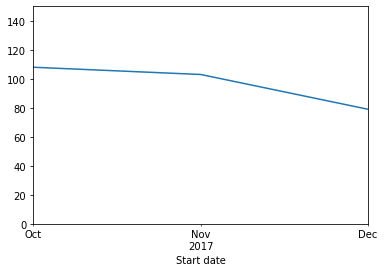

In [30]:
# It's getting cold outside, W20529

# Resample rides to monthly, take the size, plot the results
rides.resample('M', on = 'Start date')\
  .size()\
  .plot(ylim = [0, 150])

# Show the results
plt.show()

In [31]:
# Members vs casual riders over time

# Resample rides to be monthly on the basis of Start date
monthly_rides = rides.resample('M', on='Start date')['Member type']

# Take the ratio of the .value_counts() over the total number of rides
print(monthly_rides.value_counts() / monthly_rides.size())

Start date  Member type
2017-10-31  Member         0.768519
            Casual         0.231481
2017-11-30  Member         0.825243
            Casual         0.174757
2017-12-31  Member         0.860759
            Casual         0.139241
Name: Member type, dtype: float64


In [32]:
# Combining groupby() and resample()

# Group rides by member type, and resample to the month
grouped = rides.groupby('Member type')\
  .resample('M', on='Start date')

# Print the median duration for each group
print(grouped['Duration'].median())

Member type  Start date
Casual       2017-10-31    1636.0
             2017-11-30    1159.5
             2017-12-31     850.0
Member       2017-10-31     671.0
             2017-11-30     655.0
             2017-12-31     387.5
Name: Duration, dtype: float64


In [33]:
# Timezones in Pandas

# Additional datetime methods in Pandas

# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York', 
                                						 ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

2017-10-01 15:23:25-04:00
2017-10-01 20:23:25+01:00


In [35]:
## How long per weekday?
#
## Add a column for the weekday of the start of the ride
#rides['Ride start weekday'] = rides['Start date'].dt.weekday_name
#
## Print the median trip time per weekday
#print(rides.groupby('Ride start weekday')['Duration'].median())

In [36]:
## How long between rides?
#
## Shift the index of the end date up one; now subract it from the start date
#rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))
#
## Move from a timedelta to a number of seconds, which is easier to work with
#rides['Time since'] = rides['Time since'].dt.total_seconds()
#
## Resample to the month
#monthly = rides.resample('M', on = 'Start date')
#
## Print the average hours between rides each month
#print(monthly['Time since'].mean()/(60*60))